In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [17]:
customers = pd.read_csv('./dataset/feature_engineering/customers_with_clustering_features.csv')
clustering_features = ["age", "Price_Sensitivity", "purchase_frequency", "avg_purchase_value"]

In [18]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[clustering_features])
customers_scaled_df = pd.DataFrame(customers_scaled, columns=clustering_features)
customers_scaled_df["customer_id"] = customers["customer_id"]

In [19]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(customers_scaled)
    inertia.append(kmeans.inertia_)

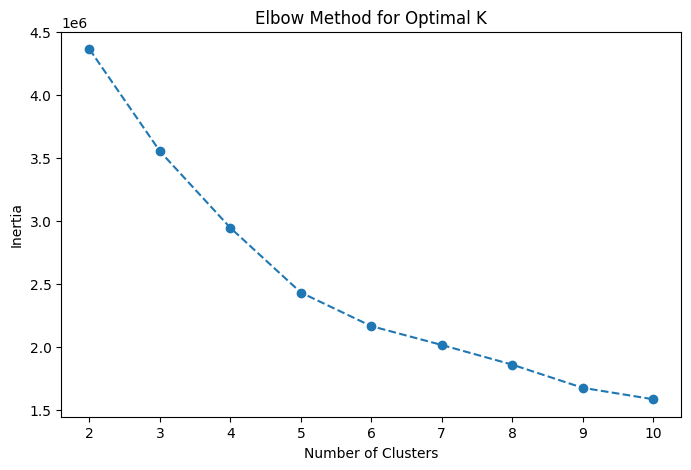

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle='dashed')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [21]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
customers_scaled_df["KMeans_Cluster"] = kmeans.fit_predict(customers_scaled)

In [22]:
silhouette_avg = silhouette_score(customers_scaled, customers_scaled_df["KMeans_Cluster"])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 5 clusters: 0.28322269963228114


In [23]:
customers = customers.merge(customers_scaled_df[["customer_id", "KMeans_Cluster"]], on="customer_id")

In [24]:
customers.to_csv("./dataset/clustered/customers_kmeans_clusters.csv", index=False)

In [ ]:
cluster_summary = customers.groupby("KMeans_Cluster")[clustering_features].mean()

In [28]:
cluster_summary

,age,Price_Sensitivity,purchase_frequency,avg_purchase_value
KMeans_Cluster,,,,
0,28.322823,0.151499,4.065783,0.024972
1,53.781216,0.433251,15.228920,0.027728
2,27.147939,0.593629,21.627315,0.025982
3,36.275684,0.608438,128.469348,0.028676
4,42.222249,0.176958,3.102547,0.070773


In [26]:
customers["KMeans_Cluster"].value_counts()

KMeans_Cluster
2    524108
1    395513
0    308209
3     77810
4     66340
Name: count, dtype: int64

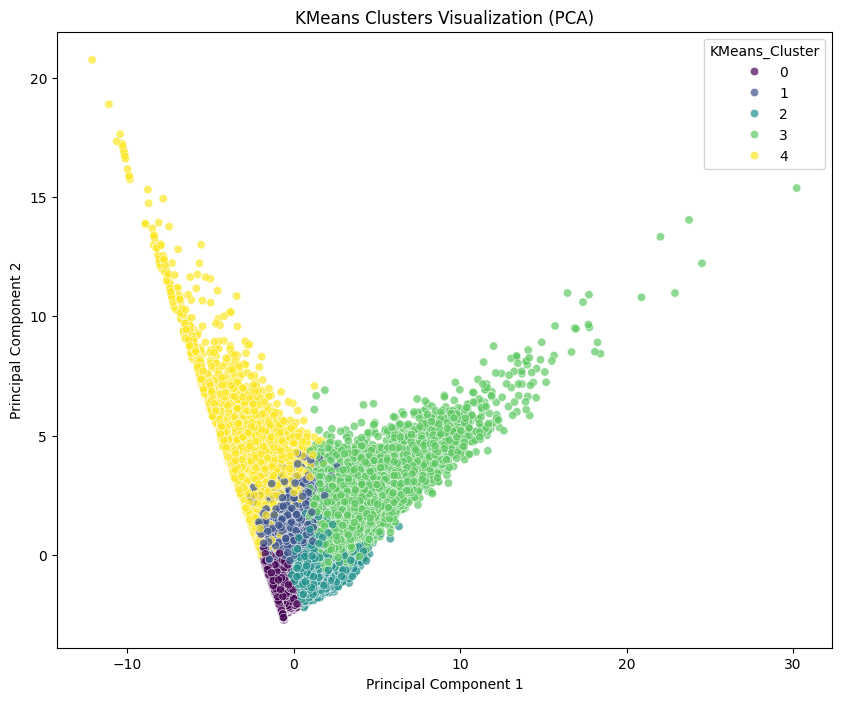

In [27]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customers_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
principal_df['KMeans_Cluster'] = customers['KMeans_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='KMeans_Cluster', data=principal_df, palette='viridis', alpha=0.7)
plt.title('KMeans Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()